In [ ]:
LOAN DEFAULT PREDICTION
Problem: Predict loan default risk for applicants.

Objective: Assist financial institutions in risk assessment

Tasks: Data Preprocessing Model Building Model Evaluation Interpretability & Reporting

In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from os import system

In [11]:
df= pd.read_csv(r"C:\Users\neeth\Downloads\loan_default_prediction_project (1).csv")

In [53]:
df.head()

,Age,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,71266.105175,0,1,639,0.007142,27060.188289,1,13068.330587,18.185533,59
1,46,37283.054601,0,1,474,0.456731,40192.994312,0,15159.338369,11.727471,69
2,32,69567.036392,0,2,750,0.329231,25444.262759,0,6131.287659,17.030462,69
3,60,72016.087392,0,0,435,0.052482,3122.213749,1,37531.880251,16.868949,26
4,25,32161.988250,1,1,315,0.450236,19197.350445,1,41466.397989,18.891582,66


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [ ]:
Let us convert the 'Object'into categorical variables

In [19]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer
df.head(10)

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266.105175,0,1,639,0.007142,27060.188289,1,13068.330587,18.185533,59
1,46,-1,37283.054601,0,1,474,0.456731,40192.994312,0,15159.338369,11.727471,69
2,32,1,69567.036392,0,2,750,0.329231,25444.262759,0,6131.287659,17.030462,69
3,60,0,72016.087392,0,0,435,0.052482,3122.213749,1,37531.880251,16.868949,26
4,25,0,32161.988250,1,1,315,0.450236,19197.350445,1,41466.397989,18.891582,66
5,38,0,24907.970169,0,2,632,0.254749,22222.047884,1,40858.167955,17.295705,28
6,56,0,82460.926885,0,1,494,0.351885,7080.862249,1,10740.566811,13.942547,37
7,36,0,56784.033902,0,2,795,0.705615,5124.816459,1,45648.550732,13.358163,31
8,40,1,24653.103640,0,2,308,0.521551,26773.247483,1,35252.547326,10.945074,36
9,28,-1,99589.305374,0,0,633,0.124647,4257.181828,1,45388.788007,13.650256,24


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   int8   
 2   Income                 1000 non-null   float64
 3   Employment_Status      1000 non-null   int8   
 4   Location               1000 non-null   int8   
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   int8   
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), int8(4)
memory usage: 66.5 KB


In [23]:
print(df.Employment_Status.value_counts())
print(df.Income.value_counts())
print(df.Location.value_counts())
print(df.Credit_Score.value_counts())
print(df.Debt_to_Income_Ratio.value_counts())
print(df.Existing_Loan_Balance.value_counts())
print(df. Loan_Status.value_counts())
print(df.Loan_Amount .value_counts())
print(df.Loan_Duration_Months.value_counts())

Employment_Status
 0    596
 1    310
-1     94
Name: count, dtype: int64
Income
150000.000000    10
71266.105175      1
88604.987013      1
47453.388254      1
78333.879004      1
                 ..
56664.051322      1
58775.702970      1
33261.963213      1
95655.851760      1
84572.442989      1
Name: count, Length: 991, dtype: int64
Location
0    348
1    344
2    308
Name: count, dtype: int64
Credit_Score
250    10
845     7
738     7
378     7
429     7
       ..
507     1
388     1
461     1
762     1
806     1
Name: count, Length: 452, dtype: int64
Debt_to_Income_Ratio
0.007142    1
0.980261    1
0.845642    1
0.635265    1
0.041560    1
           ..
0.446149    1
0.671660    1
0.333902    1
0.254259    1
0.849470    1
Name: count, Length: 1000, dtype: int64
Existing_Loan_Balance
27060.188289    1
12147.268084    1
19136.459566    1
37859.455984    1
15282.424842    1
               ..
21135.128476    1
10043.859007    1
15285.106791    1
26225.028711    1
49629.885929    1
N

In [ ]:
SPLIT THE DATA

In [25]:
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266.105175,0,1,639,0.007142,27060.188289,1,13068.330587,18.185533,59
1,46,-1,37283.054601,0,1,474,0.456731,40192.994312,0,15159.338369,11.727471,69
2,32,1,69567.036392,0,2,750,0.329231,25444.262759,0,6131.287659,17.030462,69
3,60,0,72016.087392,0,0,435,0.052482,3122.213749,1,37531.880251,16.868949,26
4,25,0,32161.988250,1,1,315,0.450236,19197.350445,1,41466.397989,18.891582,66


In [27]:
X = df.drop("Gender" , axis=1)
y = df.pop("Gender")

In [29]:
df.head()

,Age,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,71266.105175,0,1,639,0.007142,27060.188289,1,13068.330587,18.185533,59
1,46,37283.054601,0,1,474,0.456731,40192.994312,0,15159.338369,11.727471,69
2,32,69567.036392,0,2,750,0.329231,25444.262759,0,6131.287659,17.030462,69
3,60,72016.087392,0,0,435,0.052482,3122.213749,1,37531.880251,16.868949,26
4,25,32161.988250,1,1,315,0.450236,19197.350445,1,41466.397989,18.891582,66


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.34
Confusion Matrix:
 [[ 1 23 27]
 [ 2 37 31]
 [ 0 49 30]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.33      0.02      0.04        51
           0       0.34      0.53      0.41        70
           1       0.34      0.38      0.36        79

    accuracy                           0.34       200
   macro avg       0.34      0.31      0.27       200
weighted avg       0.34      0.34      0.30       200



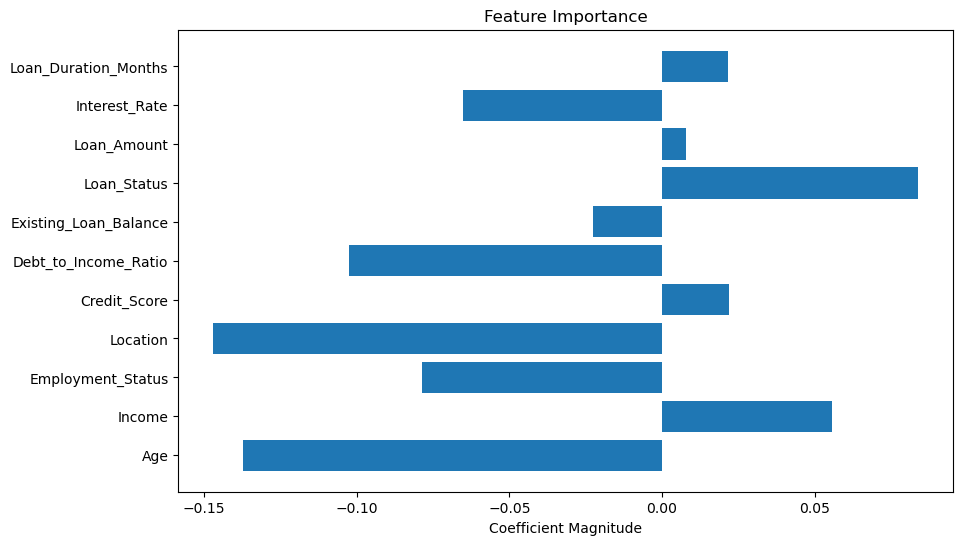

In [51]:
feature_names = X.columns
coefs = model.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs)
plt.title("Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.show()